# Next Big Thing Pipeline

### Standard Python Library Imports

In [1]:
import import_ipynb
from datetime import date, timedelta

### Imports from Next Big Thing Jupyter Notebooks

In [ ]:
#Find Category
import Step1_Find_Category_From_Thing as fcat


importing Jupyter notebook from Step1_Find_Category_From_Thing.ipynb


2022-04-24 20:22:02 INFO: Downloading default packages for language: en (English)...
2022-04-24 20:22:03 INFO: File exists: /root/stanza_resources/en/default.zip
2022-04-24 20:22:10 INFO: Finished downloading models and saved to /root/stanza_resources.
Installing /root/venv/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Making directory: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/
Copying: /root/venv/lib/python3.7/site-packages/widgetsnbextension/static/extension.js -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Copying: /root/venv/lib/python3.7/site-packages/widgetsnbextension/static/extension.js.map -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    
Enabling notebook extension jupyter-js-widgets/extension...


2022-04-24 20:22:13 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-04-24 20:22:13 INFO: Use device: cpu
2022-04-24 20:22:13 INFO: Loading: tokenize
2022-04-24 20:22:13 INFO: Loading: pos
2022-04-24 20:22:13 INFO: Loading: lemma
2022-04-24 20:22:13 INFO: Loading: depparse
2022-04-24 20:22:13 INFO: Done loading processors!


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

['Pokémon', 'Pokémon (TV series)', 'Pokémon (video game series)', 'Pokémon Red and Blue', 'List of generation I Pokémon', 'List of generation III Pokémon', 'List of generation IV Pokémon', 'List of Pokémon', 'Pokémon Legends: Arceus', 'Gameplay of Pokémon']
Pokémon (an abbreviation for Pocket Monsters in Japan) is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1996, and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport. All media works within the franchise are set in the Pokémon universe. The English slogan for the franchise is "Gotta Catch ‘Em All!". There are currently 908 Pokémon species.The franchise began as Pocket Monsters: Red and Green (later released outside of Japan as Pokémon Red and Blue), a pair of video games for the original Game Boy handheld system 

In [ ]:
#Find subreddits
import Step2_Find_Subreddits as fsub

importing Jupyter notebook from Step2_Find_Subreddits.ipynb


In [ ]:
#Find influencers
import Step3_Find_Influencers as finf

importing Jupyter notebook from Step3_Find_Influencers.ipynb


In [ ]:
#Find relevant influencer posts
import Step4_Find_Influencer_Relevant_Posts as fposts

importing Jupyter notebook from Step4_Find_Influencer_Relevant_Posts.ipynb


In [2]:
#Create CRF model to find new terms in unseen Reddit posts
import Step5_CRF_Find_New_Terms as crfnt

importing Jupyter notebook from Step5_CRF_Find_New_Terms.ipynb


2022-04-24 20:26:20 INFO: Downloading default packages for language: en (English)...


2022-04-24 20:26:29 INFO: Finished downloading models and saved to /root/stanza_resources.


2022-04-24 20:26:29 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-04-24 20:26:30 INFO: Use device: cpu
2022-04-24 20:26:30 INFO: Loading: tokenize
2022-04-24 20:26:30 INFO: Loading: pos
2022-04-24 20:26:30 INFO: Done loading processors!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


### Set Parameter Values 
The parameters will indicate how large our search scope will be within Reddit, as well as indicating whether we are running in Minimum Viable Product (MVP) mode.

Our MVP mode uses pre-created pickle files for selected topics that have already been run through the full pipeline to quickly generate a result for viewing.

In [ ]:
#Set Parameters

# For determining if existing pickle files will be used for this run. If true, if a pickle file 
# has already been created for this item, it will be used instead of retrieving fresh data 
# from Reddit
mvp_flag = False 

#For selecting subreddits
num_subreddits = 10 #Number of subreddits we will return for the analysis
min_subreddit_subscribers = 20000 #Size limit on a subreddit for inclusion in analysis

#For finding influencers
num_submissions = 50 #Number of submissions retrieved for each subreddit
num_influencers = 5 #Number of influencers returned as a ranked list - use equal sub to adjust 
                    #overall or per subreddit
min_occur = 2 #Minimum number of times a redditor must appear in ranking list
max_com = 0 #Maximum comment request limit (32 per request) for a submission (0 retrieves all)
load_subm = False #Loads pickle file if available for posts versus retrieving through api
equal_sub = True #If true, changes function to return num_influencers from each subreddit

#For finding relevant posts from influencers
per_author_limit=500 #Maximum number of comments to be returned for one user
post_limit = 10000 #Maximum number of comments/submissions to return from this process
end_date = (date.today() + timedelta(days=1)).strftime("%m/%d/%Y")  #Posts dated before this date will be included
start_date = (date.today() - timedelta(days=31)).strftime("%m/%d/%Y") #Posts dated after this date will be included




### What are we finding the Next Big Thing of?

In [ ]:
term = 'Pokemon' 



### Step 1: Get initial Wikipedia data about our user entry
This step finds the Wikipedia entry for our user entered item. It runs the Wikipedia summary of the item, found at the top of the webpage, through NLP processing to identify what we refer to as the NLP category of the item, and also finds the Wikipedia categories for the item. It filters the Wikipedia categories for those that are relevant to our original item, and creates new categories based on years/decades, that we can hopefully use to identify "newer" categories of the same subject. For example, for Squid Game:

#### wiki_term
'Squid Game'

#### nlp_cat_phrase
['Korean', 'drama', 'television', 'series']

#### best_wiki_cats
['Category:2021 South Korean television series debuts',
'Category:South Korean action television series',
'Category:South Korean horror fiction television series',
'Category:South Korean thriller television series',
'Category:Television shows set in Seoul']

#### wiki_cats
['Category:South Korean thriller television series',
'Category:2021 South Korean television series debuts',
'Category:South Korean horror fiction television series',
'Category:2020 South Korean television series debuts',
'Category:2018 South Korean television series debuts',
'Category:2022 South Korean television series debuts',
'Category:2019 South Korean television series debuts',
'Category:South Korean action television series',
'Category:Television shows set in Seoul']


In [ ]:
#Get category data
nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term = fcat.get_category_from_search_term(term, mvp_flag)

first_wiki_term: Pokémon
nlp phrase: ['Japanese', 'media', 'franchise']
wiki_cats: ['Category:1990s fads and trends', 'Category:1990s toys', 'Category:2000s fads and trends', 'Category:2000s toys', 'Category:2010s fads and trends', 'Category:2010s toys', 'Category:2020s fads and trends', 'Category:Japanese brands', 'Category:Mass media franchises', 'Category:Mass media franchises introduced in 1996', 'Category:Nintendo franchises', 'Category:Pokémon']

Remove wiki-cats too close to actual term(first term)
['Pokémon', 'Category:1990s fads and trends', 'Category:1990s toys', 'Category:2000s fads and trends', 'Category:2000s toys', 'Category:2010s fads and trends', 'Category:2010s toys', 'Category:2020s fads and trends', 'Category:Japanese brands', 'Category:Mass media franchises', 'Category:Mass media franchises introduced in 1996', 'Category:Nintendo franchises', 'Category:Pokémon']
[0.99999976 0.06104553 0.18699104 0.10478093 0.21385063 0.1245004
 0.22040233 0.12284604 0.24228421 0.106

In [ ]:
nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term


(['Japanese', 'media', 'franchise'],
 ['Category:Nintendo franchises',
  'Category:Mass media franchises introduced in 2021',
  'Category:Mass media franchises introduced in 2022',
  'Category:Mass media franchises',
  'Category:Mass media franchises introduced in 2019',
  'Category:Mass media franchises introduced in 2020',
  'Category:Mass media franchises introduced in 1996',
  'Category:1990s fads and trends',
  'Category:Mass media franchises introduced in 2018',
  'Category:2020s fads and trends',
  'Category:Japanese brands'],
 ['Category:Mass media franchises',
  'Category:Mass media franchises introduced in 1996',
  'Category:Japanese brands',
  'Category:Nintendo franchises',
  'Category:1990s fads and trends'],
 'Pokémon')

### Step 2: Get Subreddits
This step runs combinations of the NLP category words as well as the Wiki term through the Reddit subreddit search API to find subreddits that are likely to contain the words. After pulling back many possibilities for subreddits, it uses cosine similarity between the potential subreddit (using a combination of name, title, and description) and the wiki categories to select the "best" subreddits to interrogate for information on our Next Big Thing.


In [ ]:

#Get subreddits
subreddits_list = fsub.get_subreddits(wiki_term, nlp_cat_phrase, best_wiki_cats, num_subreddits, min_subreddit_subscribers, mvp_flag)


In [ ]:
subreddits_list

['nintendo',
 'halo',
 'marvelstudios',
 'moviescirclejerk',
 'Scream',
 'startrek',
 'nostalgia',
 'assassinscreed',
 'gamecollecting',
 'anime']

### Step 3: Get Influencers
This step evaluates users based on an aggregate score of their posts (comments and submissions) in the previously identified subreddits, as well as their overall Reddit Karma scores

In [ ]:
#Get influencers
listInfluencers = finf.get_influencers(subreddits_list, num_submissions, num_influencers, min_occur, mvp_flag, load_subm, wiki_term, max_com, equal_sub)

gathering submissions and comments from nintendo subreddit...
gathering submissions and comments from halo subreddit...
gathering submissions and comments from marvelstudios subreddit...
gathering submissions and comments from moviescirclejerk subreddit...
gathering submissions and comments from Scream subreddit...
gathering submissions and comments from startrek subreddit...
gathering submissions and comments from nostalgia subreddit...
gathering submissions and comments from assassinscreed subreddit...
gathering submissions and comments from gamecollecting subreddit...
gathering submissions and comments from anime subreddit...
completed gathering comments and submissions
collecting comment karma for top 250 authors...
pickle file of influencers has been created with 125 redditors


In [ ]:
listInfluencers

['MarvelsGrantMan136',
 'AutoLovepon',
 'chanma50',
 'The_Iceman2288',
 'karateema',
 'l_l_l-illiam',
 'RobotiSC',
 'Jetsflighter',
 'Kezja',
 'Turbostrider27',
 'Officer_Zack',
 'AnonDooDoo',
 'hantar7788',
 'zenzen_0',
 'zero_ms',
 'Rchaushesku',
 'DrDreidel82',
 'Otherwise_Basis_6328',
 'wallcrawlingspidey',
 'Lovro26',
 'WhoiusBarrel',
 'asilvertintedrose',
 'Conversation_Dapper',
 'joebirb',
 'Haijakk',
 'Mundology',
 'Se7en_Sinner',
 'Infernalism',
 'MulciberTenebras',
 'TesticleMeElmo',
 'cbekel3618',
 'realrimurutempest',
 'LeonKevlar',
 'InnocentTailor',
 'BattleUpSaber',
 'LittleYellowFish1',
 'dagreenman18',
 'rhythmjones',
 'cppn02',
 'sameth1',
 'Silent_Shadow05',
 'KostisPat257',
 'Grayson81',
 'Vaeon',
 'Fools_Requiem',
 'SplendidPunkinButter',
 'Dankey-Kang-Jr',
 'michhoffman',
 'Abysswatcherbel',
 'Hounds_of_war',
 'mjmannella',
 'bob_the_banannna',
 'GladiusNocturno',
 'ClassicT4',
 'Jackamalio626',
 'rietstengel',
 'Holofan4life',
 'th30be',
 'Stopthelemurs',
 'garfe

### Step 4: Get influencer relevant posts
This step finds all posts made by the influential users in the identified subreddits in a provided timeframe. If there are more posts than the parameter limit, cosine similarity between the post and the best_wiki_cats is used to determine the top posts to move to the next step of the process. 

In [ ]:
#Get relevant posts
relevant_posts = fposts.get_relevant_posts(wiki_term, listInfluencers, subreddits_list, start_date, end_date, best_wiki_cats, per_author_limit, post_limit, mvp_flag)


Start time for retrieving comments:  2022-04-24 12:36:50
Finding comments for garfe...
Finding comments for jcharlesabel...
Finding comments for 27andahalfpancakes...
Finding comments for Amiibofan101...
Finding comments for mjmannella...
Finding comments for WhoiusBarrel...
Finding comments for Fools_Requiem...
Finding comments for AnonDooDoo...
Finding comments for treefox...
Finding comments for Donmbk...
Finding comments for MulciberTenebras...
Finding comments for MapoTofuMan...
Finding comments for DrDreidel82...
Finding comments for El_DeltaStriko...
Finding comments for TheBlackoutEmpire...
Finding comments for dorkmax_executives...
Finding comments for Arbiter82...
Finding comments for KostisPat257...
Finding comments for No-Worldliness3545...
Finding comments for Jackamalio626...
Finding comments for Helpful-Muffin89...
Finding comments for HOODIEBABA...
Finding comments for cbekel3618...
Finding comments for retroanduwu24...
Finding comments for Jetsflighter...
Finding comme

In [ ]:
relevant_posts[:10]

['The big franchise trend?',
 'How Disney+ Is Promoting Itself To Japanese Anime Companies.',
 'Nickelodeon Studios Orlando, Florida. (90s).',
 'Mario, Zelda, Animal Crossing and Splatoon are the big 4 to Nintendo. All of their stores have tons of decorations and art for these 4 franchises. They are the S-tier franchises nomatter what anyone says.',
 'Nintendoeverything and Nintendolife',
 'Megami Magazine',
 "Companies aren't milking the fuck out of the genre for no reason, dude.  They're immensely popular.  If they weren't there wouldn't be so many of them.",
 "I wanna say Nintendo Power was probably a bigger part of things. A whole-ass monthly magazine dedicated to Nintendo could do a lot to help spread the word about new games and whatnot.\n\nThey also used to host their own event, [Space World](https://en.wikipedia.org/wiki/Nintendo_Space_World), which basically had what you'd expect from a live E3 conference; new reveals and announcements, gameplay demos, and any details on upcom

### Step 5: Identify Next Big Thing
This step creates a "white list" or dictionary of potential items from accumulating a large number of "siblings" based articles found in the Wikipedia categories. 
The sibling articles are also used to train a model for Conditional Random Field (CRF), in order to also allow the solution to identify unseen siblings that may be present in the relevant posts.

In [ ]:
#Find and rank top results
df_final = crfnt.calculate_final_results_for_wiki_term(wiki_term, mvp_flag)



Wikipedia term: Pokémon
See wikipedia categories and number of article saved as training data to be labeled.
Category:Nintendo franchises 136 136
Category:Mass media franchises introduced in 2021 136 0
Category:Mass media franchises introduced in 2022 138 2
Category:Mass media franchises 276 138
Category:Mass media franchises introduced in 2019 278 2
Category:Mass media franchises introduced in 2020 279 1
Category:Mass media franchises introduced in 1996 281 2
Category:1990s fads and trends 353 72
Category:Mass media franchises introduced in 2018 356 3
Category:2020s fads and trends 423 67
Category:Japanese brands 623 200


### Output

In [ ]:
print('The top 10 items found for the Next Big Thing are:')


df_final[['Entity','CRF_Model_Found']].head(10)


The top 10 items found for the Next Big Thing are:


,Entity,CRF_Model_Found
129,MORBIUS,127.0
230,VENOM,96.0
81,ETERNALS,75.0
73,DOCTOR STRANGE,72.0
51,BLACK WIDOW,57.0
68,CAPTAIN MARVEL,47.0
102,GREEN LANTERN,44.0
241,WONDER WOMAN,39.0
207,THOR,31.0
46,BLACK PANTHER,25.0


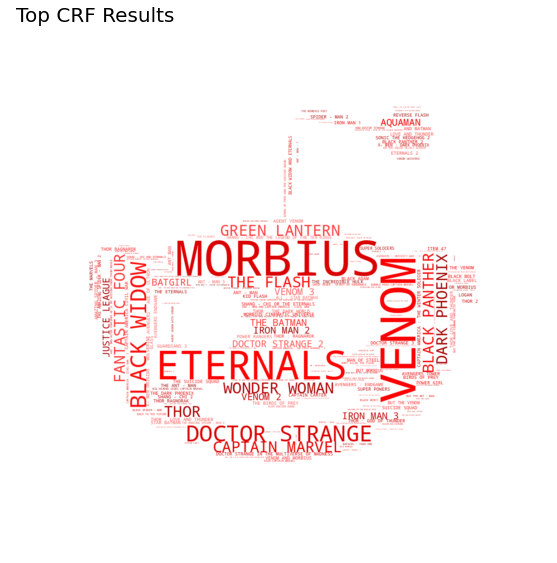

In [ ]:

crfnt.make_wordcloud(df_final)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90b052a7-f47d-474e-888f-9345355cfd9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>